In [1]:
import numpy as np, pandas as pd

df = pd.read_csv("../../datasets/income/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [2]:
df.rename(columns={"marital.status":"marital_status",
           "education.num" : "education_num",
           "capital.gain": "capital_gain",
           "capital.loss":"capital_loss",
           "hours.per.week":"hours_per_week",
           "native.country":"native_country"},inplace=True)

In [3]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
FLOAT_COLS = ['age','education_num', 'capital_gain','capital_loss','hours_per_week']
for col in FLOAT_COLS:
    df[col] = df[col].astype("float")
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
dtype: object

In [5]:
# Each row is a document for iid sample in this dataset

In [6]:
# Both IBM and Nvidia piclke their tokens .. easiear at inference time ?
vocabulary_path = 'income_coder.pickle'

import pickle
from utils.column_code import ColumnTokenizer, FloatTokenizer, CategoricalTokenizer

# filling missing rows with None
df = df.fillna('None')

column_codes = ColumnTokenizer()

beg = 0
cc = None

#ACTION MAKE SURE THE COLUMNS ARE CORRECT HERE.
EXCLUDED_COLS = []
columns = [col for col in df.columns if col not in EXCLUDED_COLS]


for column in columns:
    start_id = beg if cc is None else cc.end_id
    print(column, start_id)
    if column in FLOAT_COLS:
        # robust works best for income dataset ()
        cc = FloatTokenizer(column, df[[column]], start_id, transform="log")

    else:
        cc = CategoricalTokenizer(column, df[column], start_id)

    column_codes.register(column, cc)

# add 1 for newline char to separate each row
print('Each row uses', sum(column_codes.sizes) + 1, 'tokens')

# save the encoder and decoder
with open(vocabulary_path, 'wb') as handle:
    pickle.dump(column_codes, handle)

age 0
workclass 25
fnlwgt 34
education 21682
education_num 21698
marital_status 21716
occupation 21723
relationship 21738
race 21744
sex 21749
capital_gain 21751
capital_loss 21831
hours_per_week 21906
native_country 21931
income 21973
Each row uses 37 tokens


In [7]:
for col, size in zip(column_codes.columns, column_codes.sizes):
    print(f'{col}:\t {size}')

age:	 3
workclass:	 1
fnlwgt:	 1
education:	 1
education_num:	 3
marital_status:	 1
occupation:	 1
relationship:	 1
race:	 1
sex:	 1
capital_gain:	 9
capital_loss:	 8
hours_per_week:	 3
native_country:	 1
income:	 1


<Axes: ylabel='Frequency'>

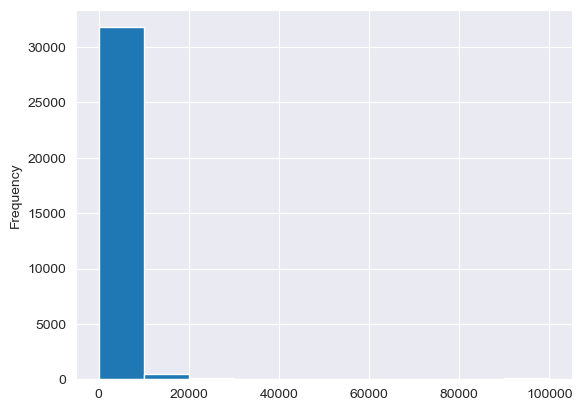

In [8]:
df.capital_gain.plot(kind="hist")

<Axes: ylabel='Frequency'>

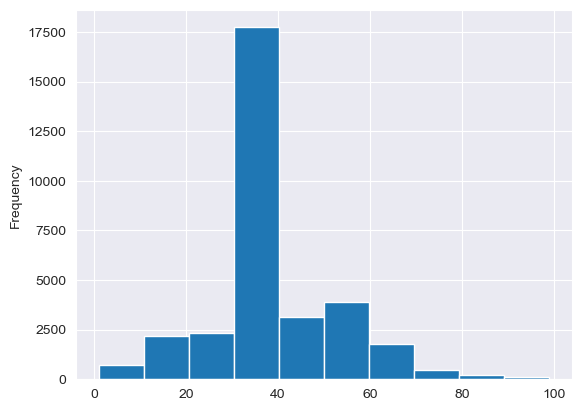

In [9]:
df.hours_per_week.plot(kind="hist")

In [10]:
column_codes = ColumnTokenizer()
with open(vocabulary_path, 'rb') as handle:
    column_codes = pickle.load(handle)

In [11]:
import json
from utils.tabular_tokenizer import TabularTokenizer
ENDOFTEXT = '<end>'
DELIMITER = '|'
tokenizer = TabularTokenizer(vocabulary_path,
                             special_tokens=['\n', ENDOFTEXT],
                             delimiter=DELIMITER)

In [12]:
tokenizer.eor

21975

In [13]:
float_str = '2450.46' # assume
token_ids = column_codes.encode('capital_loss', float_str)
print('Token ids for {} is: {}'.format(float_str, token_ids))
amt_str = column_codes.decode('capital_loss', token_ids)
print('Recovered Amount for {} is: {}\n'.format(float_str, amt_str))

Token ids for 2450.46 is: [21904, 21899, 21881, 21875, 21865, 21854, 21850, 21831]
Recovered Amount for 2450.46 is: 2450.45989


In [14]:
work_class = 'Private'
token_ids = column_codes.encode('workclass', work_class)
print('Token ids for {} is: {}'.format(work_class, token_ids))
amt_str = column_codes.decode('workclass', token_ids)
print('Recovered Merchant City for {} is: {}'.format(work_class, amt_str))

Token ids for Private is: [26]
Recovered Merchant City for Private is: Private


In [15]:
# so the script looks like: 
import pandas as pd
import pickle
from utils.column_code import ColumnTokenizer, FloatTokenizer, CategoricalTokenizer
from utils.tabular_tokenizer import TabularTokenizer

# Constants
START = "<start>"
ENDOFTEXT = '<end>'
DELIMITER = '|'
VOCABULARY_PATH = 'income_coder.pickle'
FLOAT_COLS = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
EXCLUDED_COLS = []

# Sample DataFrame (replace with your actual data)
# df = pd.read_csv("../../datasets/income/adult.csv")  # Assuming the dataset path is correct

# Fill missing values
df = df.fillna('?')

# Initialize ColumnTokenizer
column_codes = ColumnTokenizer()
beg = 0
cc = None
columns = [col for col in df.columns if col not in EXCLUDED_COLS]

# Register columns
for column in columns:
    start_id = beg if cc is None else cc.end_id
    if column in FLOAT_COLS:
        cc = FloatTokenizer(column, df[[column]], start_id, transform="log")
    else:
        cc = CategoricalTokenizer(column, df[column], start_id)
    column_codes.register(column, cc)

# Save the encoder and decoder
with open(VOCABULARY_PATH, 'wb') as handle:
    pickle.dump(column_codes, handle)

# Load the tokenizer
tokenizer = TabularTokenizer(VOCABULARY_PATH, special_tokens=['\n', ENDOFTEXT], delimiter=DELIMITER)

# Encode the DataFrame
encoded_docs = []
for _, row in df.iterrows():
    encoded_row = []
    for col in columns:
        encoded_value = column_codes.encode(col, str(row[col]))
        encoded_row.extend(encoded_value)
    encoded_docs.append(encoded_row)

# Decode a sample encoded row
sample_encoded_row = encoded_docs[0]
decoded_row = []
for col, size in zip(columns, column_codes.sizes):
    token_ids = sample_encoded_row[:size]
    decoded_value = column_codes.decode(col, token_ids)
    decoded_row.append(decoded_value)
    sample_encoded_row = sample_encoded_row[size:]

# Display the encoded documents and decoded row
print(f"Encoded Documents (first 3): {encoded_docs[:3]}")  # Show the first 3 encoded documents
print(f"Decoded Row: {decoded_row}")  # Show the decoded values of the first encoded row


Encoded Documents (first 3): [[24, 13, 0, 25, 34, 21682, 21715, 21706, 21704, 21716, 21723, 21738, 21744, 21749, 21829, 21821, 21811, 21801, 21791, 21781, 21771, 21761, 21751, 21905, 21894, 21888, 21880, 21866, 21854, 21850, 21831, 21929, 21922, 21914, 21931, 21973], [24, 11, 8, 26, 35, 21682, 21715, 21706, 21704, 21716, 21724, 21738, 21744, 21749, 21829, 21821, 21811, 21801, 21791, 21781, 21771, 21761, 21751, 21905, 21894, 21888, 21880, 21866, 21854, 21850, 21831, 21928, 21924, 21915, 21931, 21973], [23, 19, 1, 25, 36, 21683, 21715, 21707, 21698, 21716, 21723, 21739, 21745, 21749, 21829, 21821, 21811, 21801, 21791, 21781, 21771, 21761, 21751, 21905, 21894, 21888, 21880, 21866, 21854, 21850, 21831, 21929, 21922, 21914, 21931, 21973]]
Decoded Row: ['89.69979', '?', '77053', 'HS-grad', '8.93521', 'Widowed', '?', 'Not-in-family', 'White', 'Female', '0.00000', '4355.99989', '39.64639', 'United-States', '<=50K']


In [16]:
print(df.iloc[0])

age                        90.0
workclass                     ?
fnlwgt                    77053
education               HS-grad
education_num               9.0
marital_status          Widowed
occupation                    ?
relationship      Not-in-family
race                      White
sex                      Female
capital_gain                0.0
capital_loss             4356.0
hours_per_week             40.0
native_country    United-States
income                    <=50K
Name: 0, dtype: object


In [17]:
len(encoded_docs[0])

36